<a href="https://colab.research.google.com/github/mariliabrito/gunviolence/blob/main/Viol%C3%AAncia_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Violência Escolar</font>
## <font color ="#00b8ff">Trainees - 2022.2</font>

## <font color ="#00b8ff">1. Introdução</font>

Fornecer um contexto do problema, trazer dados sobre violência escolar com armas, esclarecer os objetivos do trabalho, informar de onde pegamos o notebook e sua credibilidade, descrever as colunas do dataset, etc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [2]:
# Importando 4 abas do arquivo de excel
# As abas dos datasets são: incidente, atirador, vítima, arma.

df_incid = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=1, parse_dates=["Date"]) #Rafael, Gisele e Dantas (Marília)
df_shoot = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=2) #Hermano e Duda (Jonas)
df_victm = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=3) #Hermano e Duda (Jonas)
df_weapn = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=4) #Rafael, Gisele e Dantas (Marília)

In [ ]:
df_shoot.describe(include='all') #Esse comando inclui TODAS as colunas do referido dataset.

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
count,2294,1865,1928,643,2151,2289,2285,2286,706,182,243,186
unique,2060,67,4,8,20,12,2,4,439,149,3,76
top,19700415ARPIP,17,Male,Black,Student,Fled/Apprehended,No,None,Murder,No Suspect,No,No
freq,8,239,1838,314,934,845,2063,1957,44,14,139,102


In [ ]:
df_weapn.describe(include='all') 

,incidentid,weaponcaliber,weapondetails,weapontype
count,2071,1442,93,2000
unique,2018,35,67,9
top,20171114CARAR,Unknown,Gel pellet gun,Handgun
freq,4,734,4,1404


In [ ]:
df_victm.describe(include='all') 

,incidentid,race,injury,gender,schoolaffiliation,age
count,3099,317,3099,2395,2775,2817
unique,1868,5,4,3,19,74
top,19860516WYCOC,Black,Wounded,Male,Student,Teen
freq,74,153,1840,1809,1885,535


In [ ]:
df_incid.describe(include='all') 

<ipython-input-9-018d68bb2ac2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_incid.describe(include='all')


,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
count,2069,2069,694,734,2069.000000,2069,2058,2068,2069,2069,...,1768,2055,2055,2061,1761,1913,1645,1979,1409,1096
unique,2068,2009,17,4,NaN,1745,4,1777,936,52,...,3,2,2,3,2,3,2,2,53,2
top,20210902CASAL,https://www.columbine-angels.com/School_Violen...,2,Local,NaN,2021-09-02 00:00:00,Fall,Central High School,Chicago,CA,...,No,No,No,No,No,No,No,No,1,No
freq,2,15,128,504,NaN,6,699,17,63,215,...,1357,2003,2011,2016,1680,1795,1408,1882,629,905
first,NaN,NaN,NaN,NaN,NaN,1970-01-05 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-06-20 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.766554,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.996184,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


In [ ]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Incident_ID         2069 non-null   object        
 1   Sources             2069 non-null   object        
 2   Number_News         694 non-null    object        
 3   Media_Attention     734 non-null    object        
 4   Reliability         2069 non-null   int64         
 5   Date                2069 non-null   datetime64[ns]
 6   Quarter             2058 non-null   object        
 7   School              2068 non-null   object        
 8   City                2069 non-null   object        
 9   State               2069 non-null   object        
 10  School_Level        2045 non-null   object        
 11  Location            2066 non-null   object        
 12  Location_Type       2064 non-null   object        
 13  During_School       2047 non-null   object      

In [ ]:
df_shoot.head()

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,NaN,NaN
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,NaN,NaN
3,20220609ALWAG,NaN,NaN,NaN,Police Officer/SRO,Law Enforcement,No,None,NaN,NaN,NaN,NaN
4,20220608ARLIL,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN


In [ ]:
df_victm.head()

,incidentid,race,injury,gender,schoolaffiliation,age
0,20220620ILGRC,NaN,Wounded,Female,No Relation,34
1,20220620ILGRC,NaN,Wounded,Male,No Relation,16
2,20220620ILGRC,NaN,Wounded,Female,No Relation,17
3,20220609ALWAG,Black,Fatal,Male,No Relation,32
4,20220605INWEG,NaN,Wounded,Male,NaN,19


In [ ]:
df_weapn.head()

,incidentid,weaponcaliber,weapondetails,weapontype
0,20220620ILGRC,NaN,NaN,NaN
1,20220613WAMAE,NaN,NaN,Handgun
2,20220610ALBYB,NaN,NaN,Handgun
3,20220609ALWAG,Service Weapon,NaN,Handgun
4,20220608ARLIL,NaN,NaN,NaN


## <font color ="#00b8ff">2. Limpeza</font>

Realizar limpeza e uniformização do dataset. Também é possível juntar datasets pela coluna incidentid.

In [3]:
#Removendo valores duplicados caso existam
df_incid = df_incid.drop_duplicates()
df_shoot = df_shoot.drop_duplicates()
df_victm = df_victm.drop_duplicates()
df_weapn = df_weapn.drop_duplicates()

#Verificando
print(df_incid.isnull().sum())
print("="*27)
print(df_shoot.isnull().sum())
print("="*27)
print(df_victm.isnull().sum())
print("="*27)
print(df_weapn.isnull().sum())


Incident_ID              0
Sources                  0
Number_News           1375
Media_Attention       1335
Reliability              0
Date                     0
Quarter                 11
School                   1
City                     0
State                    0
School_Level            24
Location                 3
Location_Type            5
During_School           22
Time_Period            164
First_Shot             475
Summary                  0
Narrative               15
Situation              163
Targets                306
Accomplice             301
Hostages                14
Barricade               14
Officer_Involved         8
Bullied                308
Domestic_Violence      156
Gang_Related           424
Preplanned              90
Shots_Fired            660
Active_Shooter_FBI     973
dtype: int64
incidentid              0
age                   406
gender                345
race                 1565
schoolaffiliation     132
shooteroutcome          5
shooterdied          

In [4]:
#O tratamento de variáveis de tipo String do dataset 'Incidentes':
colunas_string=['Number_News','Media_Attention','School','School_Level','Location','Location_Type','During_School','First_Shot','Narrative','Situation','Targets','Accomplice','Hostages','Barricade','Officer_Involved','Bullied','Domestic_Violence','Gang_Related','Preplanned','Shots_Fired','Active_Shooter_FBI']

df_incid[colunas_string] = df_incid[colunas_string].fillna("Unknown")

#O tratamento de variáveis de tipo numérico, substituindo os valores nulos por 0.
df_incid['Reliability'] = df_incid['Reliability'].fillna(-1)
df_incid.isnull().sum()

#O tratamento da coluna de estações
seasons_dict = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

df_incid['Quarter'] = pd.to_datetime(df_incid['Date']).dt.month.map(seasons_dict)

def get_time_period(time_string):                             #Tentando preencher os períodos do dia com null a partir da hora do primeiro tiro
    if ':' in time_string:
        hour = int(time_string.split(':')[0])
        if hour < 12 and hour < 6:
          return 'Night'
        if hour < 12:
            return 'Morning'
        elif hour < 18:
            return 'Afternoon'
        else:
            return 'Night'
    else:
        if 'AM' in time_string:
            return 'Morning'
        else:
            return 'Afternoon/Night'

df_incid['Time_Period'].fillna(df_incid['First_Shot'].apply(get_time_period), inplace=True)

df_incid = df_incid.fillna('Unknown') #preenchendo o restante com 'Unknown'

In [5]:
#Nomeando meses
month_names = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [6]:
# Extraindo ano, mês e dia do dataset
df_incid['Year'] = df_incid['Date'].dt.year
df_incid['Month'] = pd.to_datetime(df_incid['Date']).dt.month.map(month_names)
df_incid['Day'] = df_incid['Date'].dt.day

In [7]:
df_incid['Time_Period'].value_counts()

Morning Classes      373
Afternoon Classes    213
Sport Event          208
Dismissal            200
Afternoon/Night      154
Lunch                146
Evening              137
After School         137
Night                129
School Start         110
Not a School Day      96
Before School         94
School Event          52
Unknown               12
Morning                5
Afternoon              2
Not A School Day       1
Name: Time_Period, dtype: int64

In [8]:
df_incid['Quarter'].value_counts()

Fall      675
Winter    588
Spring    558
Summer    248
Name: Quarter, dtype: int64

In [ ]:
df_shoot.describe()

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
count,2180,1774,1835,615,2048,2175,2173,2174,665,174,230,181
unique,2060,67,4,8,20,12,2,4,439,149,3,76
top,20220307IAEAD,17,Male,Black,Student,Fled/Apprehended,No,None,Murder,No Suspect,No,No
freq,4,234,1746,293,907,796,1952,1847,43,9,133,98


In [ ]:
df_weapn.describe()

,incidentid,weaponcaliber,weapondetails,weapontype
count,2058,1434,85,1988
unique,2018,35,67,9
top,19990420COCOL,Unknown,Gel pellet gun,Handgun
freq,4,729,4,1395


In [ ]:
df_weapn["weaponcaliber"].value_counts()

Unknown            729
.22 caliber        184
.38 caliber        110
9mm                 76
BB                  49
.25 caliber         43
Service Weapon      36
.45 caliber         34
.357 caliber        33
Pellet              30
12 gauge            20
.32 caliber         15
.40 caliber         13
AR-15                7
.223 caliber         6
airsoft              5
AK-47                5
.44 caliber          5
Airsoft              5
Semiautomatic        4
.30-30               4
20 gauge             3
.30-06               2
.27 caliber          2
.308 caliber         2
10mm                 2
Service weapon       2
Double-barreled      1
5.56mm               1
.22 caliber          1
7.26mm               1
Submachine gun       1
410 gauge            1
Starter              1
Automatic            1
Name: weaponcaliber, dtype: int64

In [9]:
df_weapn.loc[df_weapn["weaponcaliber"] == '.22 caliber ',"weaponcaliber"] = '.22 caliber' #renomeando o .22 que estava com um espaço no final
df_weapn.loc[df_weapn["weaponcaliber"] == 'airsoft',"weaponcaliber"] = 'Airsoft' #renomeando os "airsoft" minúsculos
df_weapn.loc[df_weapn["weaponcaliber"] == 'Service weapon',"weaponcaliber"] = 'Service Weapon' 

In [ ]:
df_weapn["weaponcaliber"].value_counts()

Unknown            729
.22 caliber        185
.38 caliber        110
9mm                 76
BB                  49
.25 caliber         43
Service Weapon      38
.45 caliber         34
.357 caliber        33
Pellet              30
12 gauge            20
.32 caliber         15
.40 caliber         13
Airsoft             10
AR-15                7
.223 caliber         6
AK-47                5
.44 caliber          5
Semiautomatic        4
.30-30               4
20 gauge             3
.30-06               2
.27 caliber          2
.308 caliber         2
10mm                 2
Double-barreled      1
5.56mm               1
7.26mm               1
Submachine gun       1
410 gauge            1
Starter              1
Automatic            1
Name: weaponcaliber, dtype: int64

In [ ]:
df_weapn["weaponcaliber"].unique()


array([nan, 'Service Weapon', 'Airsoft', '9mm', 'BB', 'Pellet',
       '.22 caliber', 'AR-15', '.38 caliber', '.223 caliber',
       '.45 caliber', '.40 caliber', 'Unknown', '5.56mm', '.357 caliber',
       'Semiautomatic', '.32 caliber', '12 gauge', '20 gauge', 'AK-47',
       '10mm', '.44 caliber', '.308 caliber', 'Double-barreled', '.30-06',
       '.25 caliber', '.27 caliber', '7.26mm', '.30-30', 'Submachine gun',
       '410 gauge', 'Starter', 'Automatic'], dtype=object)

In [10]:
df_shoot = df_shoot.fillna('Unknown') #Preenchendo as informações nulas da aba atirador
df_weapn = df_weapn.fillna('Unknown') #Preenchendo as informações nulas da aba arma

In [ ]:
df_shoot.isnull().sum() 

incidentid           0
age                  0
gender               0
race                 0
schoolaffiliation    0
shooteroutcome       0
shooterdied          0
injury               0
chargesfiled         0
verdict              0
minorchargedadult    0
criminalhistory      0
dtype: int64

In [11]:
#Preenchendo os valores nulos da coluna de gênero com Unknown
df_victm['gender'] = df_victm['gender'].fillna('Unknown') 
df_victm['schoolaffiliation'] = df_victm['schoolaffiliation'].fillna('Unknown')
df_victm['race'] = df_victm['race'].fillna('Unknown')

In [ ]:
df_shoot["age"].unique()

array(['Unknown', '15', 'Teen', '18', '40', 'Adult', '55', '17', '13',
       '7', '16', '25', '57', '20', 'Child', '23', '11', 'Minor', '12',
       '8', '31', '14', '36', '43', '10', '39', '34', '19', '27', '21',
       '45', '33', '28', '6', '54', '62', '24', '26', '78', '41', '51',
       '47', '32', '38', '66', '35', '30', '74', '29', '22', '46', '50',
       '59', '53', '49', '44', '37', '63', '9', '56', '48', '42', '5',
       '65', '68', '52', '61', '72'], dtype=object)

In [12]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 20:
            return 'Teen'
        elif age >20:
            return 'Adult'
        else:
          return 'Unknown'

df_incid['age'] = pd.to_numeric(df_shoot['age'], errors='coerce')
df_incid['ageclass'] = df_incid['age'].apply(classify_age)
df_incid['ageclass'].value_counts()

Teen       912
Unknown    820
Adult      281
Child       56
Name: ageclass, dtype: int64

In [13]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 19:
            return 'Teen'
        else:
            return 'Adult'

df_victm['age'] = pd.to_numeric(df_victm['age'], errors='coerce')
df_victm['ageclass'] = df_victm['age'].apply(classify_age)

df_victm

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass
0,20220620ILGRC,Unknown,Wounded,Female,No Relation,34.0,Adult
1,20220620ILGRC,Unknown,Wounded,Male,No Relation,16.0,Teen
2,20220620ILGRC,Unknown,Wounded,Female,No Relation,17.0,Teen
3,20220609ALWAG,Black,Fatal,Male,No Relation,32.0,Adult
4,20220605INWEG,Unknown,Wounded,Male,Unknown,19.0,Teen
...,...,...,...,...,...,...,...
3094,19700323CADAL,Unknown,Wounded,Male,Student,16.0,Teen
3095,19700206OHJOC,Unknown,Wounded,Male,Student,18.0,Teen
3096,19700105DCUNW,Unknown,None,Male,Unknown,16.0,Teen
3097,19700105DCSOW,Unknown,Wounded,Male,Student,NaN,Adult


<Axes: >

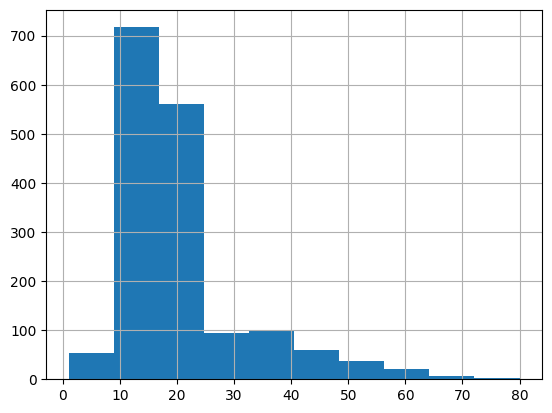

In [ ]:
df_victm['age'].hist() #analisando a distribuição 

Axes(0.125,0.11;0.775x0.77)


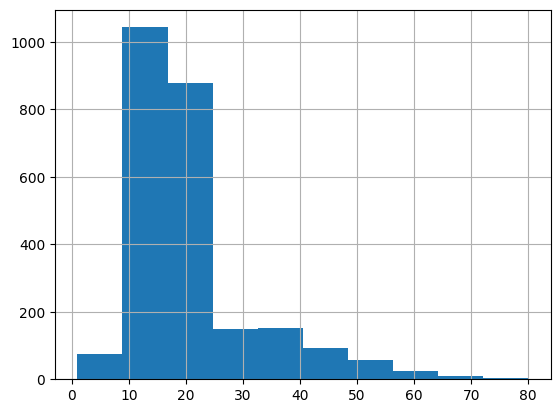

In [14]:
nan_interpol = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest')) #verificando a coerência da interpolação das idades
print(nan_interpol.hist())
df_victm['ageinterp'] = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest'))

Verificação final de valores null

In [15]:
print(df_incid.isnull().sum())
print("="*27)
print(df_shoot.isnull().sum())
print("="*27)
print(df_victm.isnull().sum()) #Na coluna ['age'] ainda existem valores null pq estes não foram substituídos, preferimos criar uma nova coluna com valores interpolados
print("="*27)
print(df_weapn.isnull().sum())

Incident_ID             0
Sources                 0
Number_News             0
Media_Attention         0
Reliability             0
Date                    0
Quarter                 0
School                  0
City                    0
State                   0
School_Level            0
Location                0
Location_Type           0
During_School           0
Time_Period             0
First_Shot              0
Summary                 0
Narrative               0
Situation               0
Targets                 0
Accomplice              0
Hostages                0
Barricade               0
Officer_Involved        0
Bullied                 0
Domestic_Violence       0
Gang_Related            0
Preplanned              0
Shots_Fired             0
Active_Shooter_FBI      0
Year                    0
Month                   0
Day                     0
age                   820
ageclass                0
dtype: int64
incidentid           0
age                  0
gender               0
race    

## <font color ="#00b8ff">3. Análise Descritiva</font>

Realizar análise do dataset, mostrar série histórica, trazer visualizações, etc

### <font color ="#00b8ff">3.1 Análise de série histórica e geográfica - Duda e Gisele</font>




Observamos uma tendência de aumento na quantidade de incidentes em escolas ao longo do tempo.

<function matplotlib.pyplot.show(close=None, block=None)>

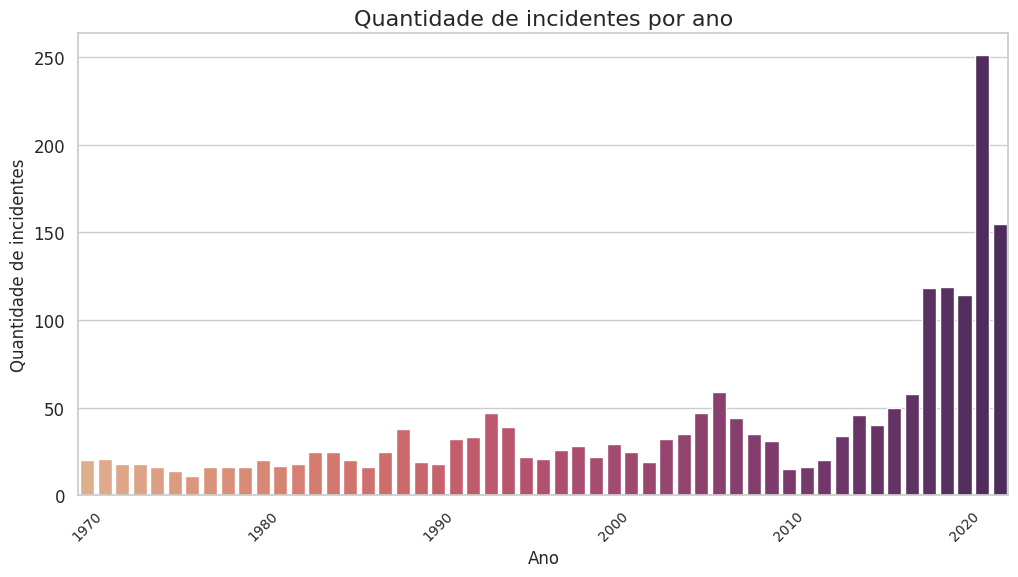

In [16]:
plt.figure(figsize=(12,6)) #importante plotar tamanho antes do gráfico no seaborn
sns.set_theme(style="whitegrid")
sns.countplot(x=df_incid["Year"], palette="flare").xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation=45, fontsize=10) #rotaciona valores do eixo x
plt.yticks(fontsize=12) #altera tamanho de fonte de valores do eixo y
plt.title('Quantidade de incidentes por ano', fontsize=16) #define título para gráfico
plt.xlabel('Ano', fontsize=12) #define título para eixo x
plt.ylabel('Quantidade de incidentes', fontsize=12) #define título para eixo y
# plt.tight_layout() #otimiza o tamanho do layout do gráfico
plt.show

<Axes: title={'center': 'Contagem de incidências por estado'}, xlabel='State', ylabel='count'>

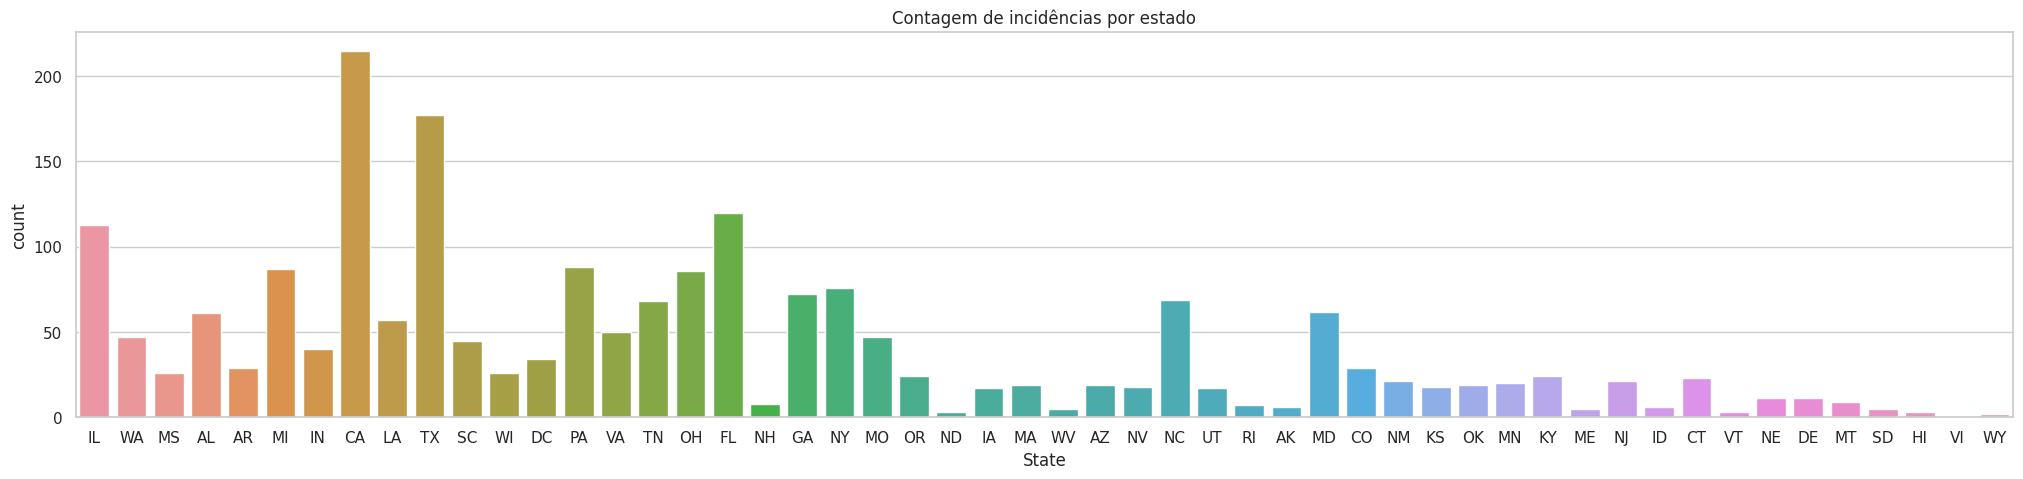

In [25]:
fig = plt.figure(figsize=(25,5))
plt.title('Contagem de incidências por estado')
sns.countplot(x=df_incid["State"])

<Axes: xlabel='Year', ylabel='count'>

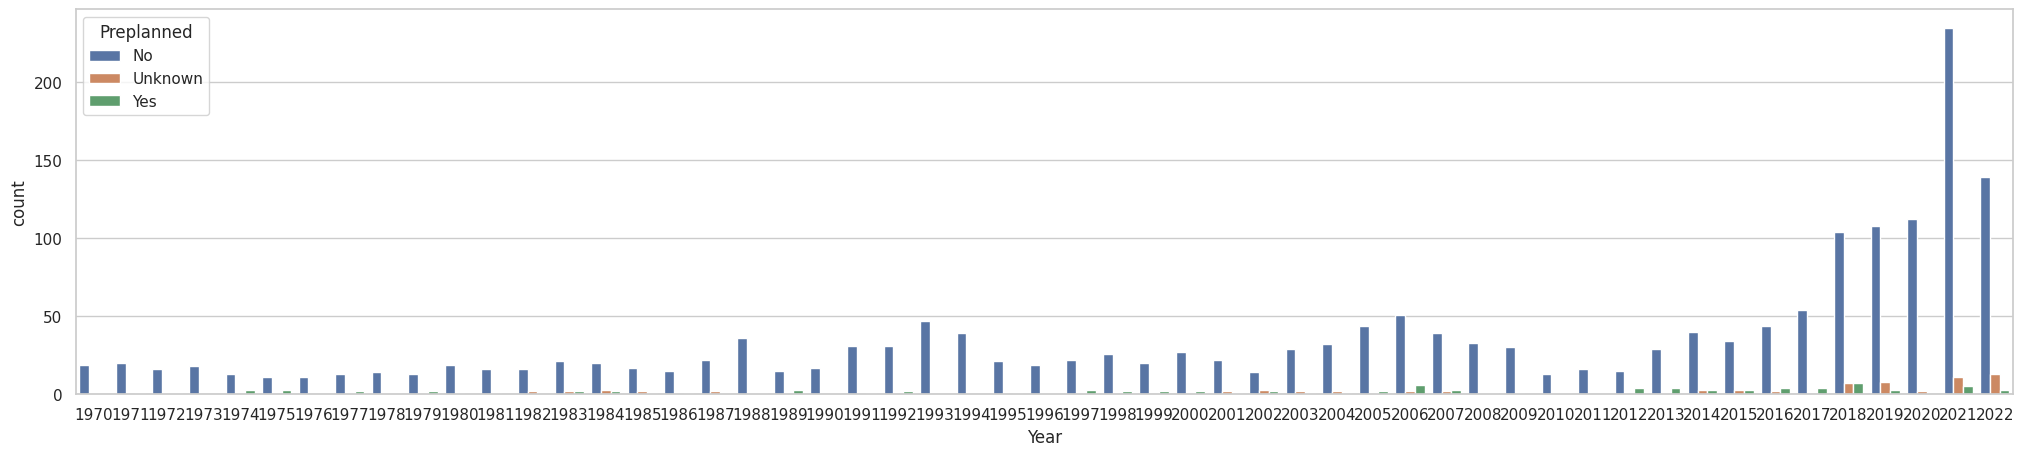

In [18]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_incid["Year"], hue=df_incid['Preplanned'])

<Axes: xlabel='Year', ylabel='count'>

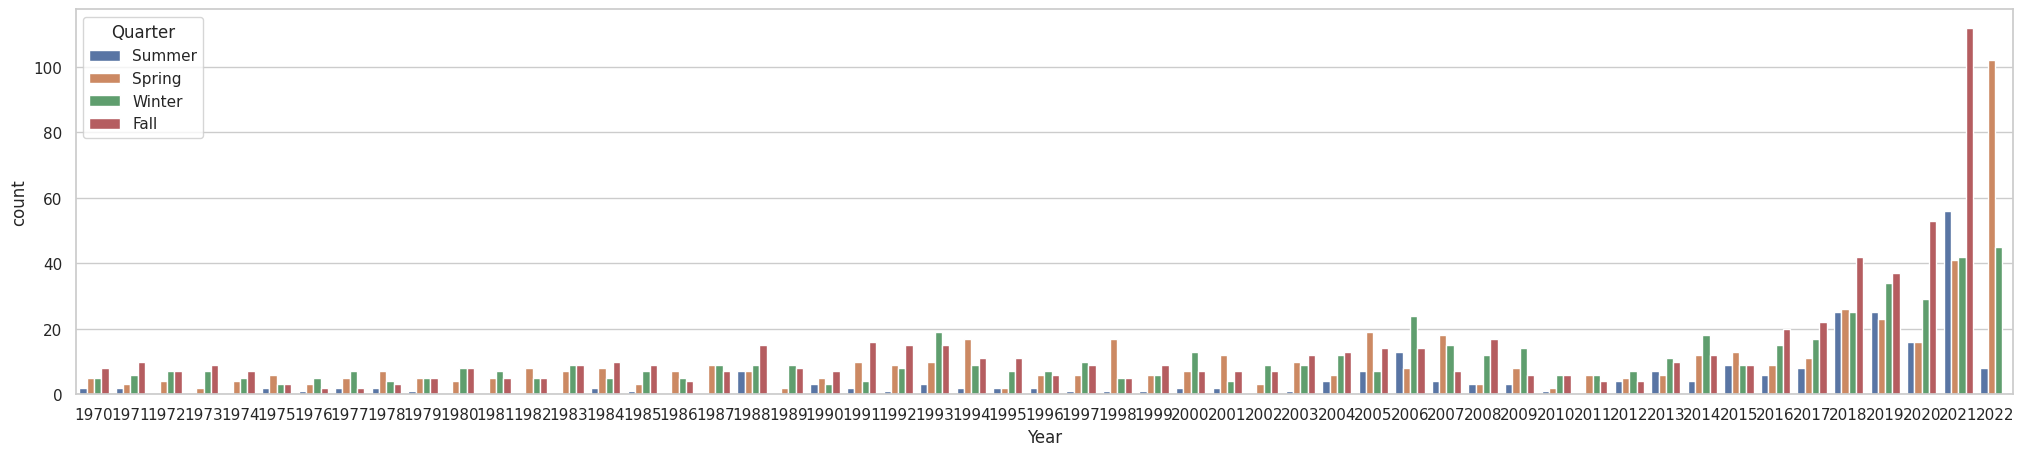

In [19]:
fig = plt.figure(figsize=(25,5))
plt.title('Contagem de incidências por ano divididos por estação do ano')
sns.countplot(x=df_incid["Year"], hue=df_incid['Quarter'])

<Axes: title={'center': 'Contagem de incidências por mês'}, xlabel='Month', ylabel='count'>

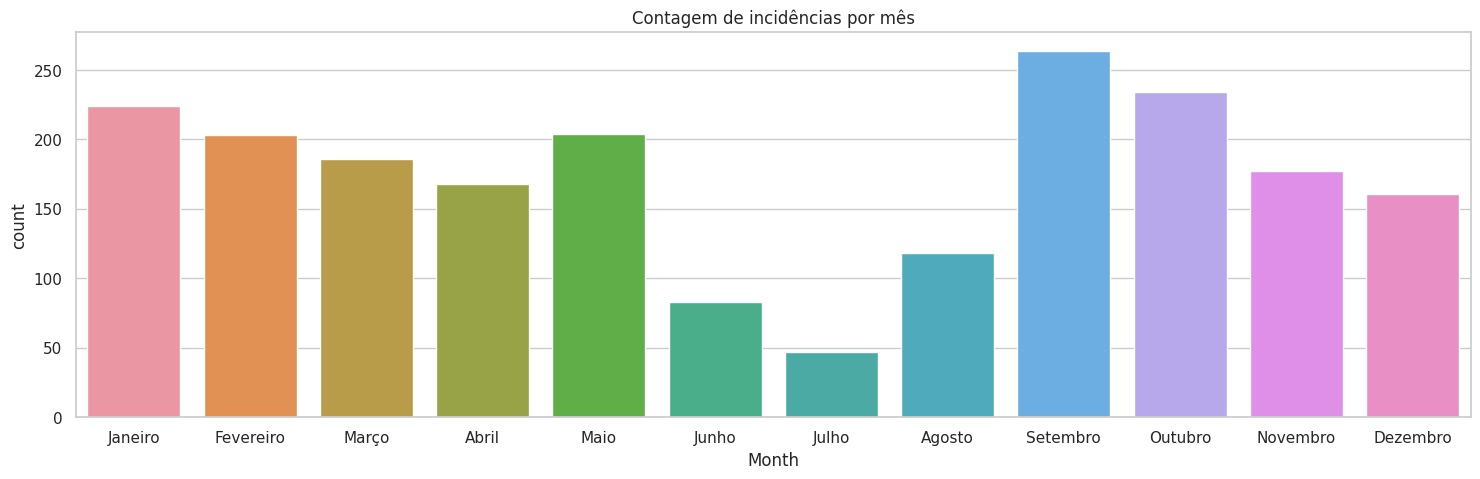

In [30]:
# Quantidade de shootings por mês 
fig = plt.figure(figsize=(18,5))
ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.title('Contagem de incidências por mês')
sns.countplot(x=df_incid["Month"], order=ordem)

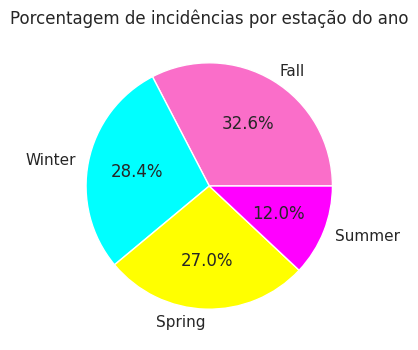

In [69]:
# Porcentagem de incidências por estação do ano
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Porcentagem de incidências por estação do ano')

contagem = df_incid["Quarter"].value_counts() # 4 valores
porcentagem = contagem / contagem.sum() * 100 # calculando a porcentagem de cada estação
cores = ['#fa6ec9', 'cyan', 'yellow', 'magenta'] # cores que acho bonitas - #fa6ec9: rosinha não tão claro nem tão escuro
ax.pie(porcentagem, labels=porcentagem.index, autopct='%1.1f%%', colors=cores)

plt.show()

In [ ]:
df_incid["Year"].value_counts().values

array([251, 155, 119, 118, 114,  59,  58,  50,  47,  47,  46,  44,  40,
        39,  38,  35,  35,  34,  33,  32,  32,  31,  29,  28,  26,  25,
        25,  25,  25,  22,  22,  21,  21,  20,  20,  20,  20,  19,  19,
        18,  18,  18,  18,  17,  16,  16,  16,  16,  16,  16,  15,  14,
        11])

### <font color ="#00b8ff">3.2 Análise dos Incidentes - João Victor, Hermano e Raffael</font>

In [ ]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,Year,Month,Day,age,ageclass
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,Unknown,No,100,No,2022,Junho,20,NaN,Unknown
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,Unknown,No,99,No,2022,Junho,13,15.0,Teen
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,Unknown,No,1,No,2022,Junho,10,NaN,Unknown
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,Unknown,Unknown,Unknown,Unknown,No,2022,Junho,9,NaN,Unknown
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,Unknown,No,99,No,2022,Junho,8,NaN,Unknown


In [ ]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Incident_ID         2069 non-null   object        
 1   Sources             2069 non-null   object        
 2   Number_News         2069 non-null   object        
 3   Media_Attention     2069 non-null   object        
 4   Reliability         2069 non-null   int64         
 5   Date                2069 non-null   datetime64[ns]
 6   Quarter             2069 non-null   object        
 7   School              2069 non-null   object        
 8   City                2069 non-null   object        
 9   State               2069 non-null   object        
 10  School_Level        2069 non-null   object        
 11  Location            2069 non-null   object        
 12  Location_Type       2069 non-null   object        
 13  During_School       2069 non-null   object      

In [ ]:
df_incid.describe()

,Reliability,Year,Day,age
count,2069.000000,2069.000000,2069.000000,1249.000000
mean,2.766554,2005.714355,15.745771,20.261009
std,0.996184,15.432015,8.732714,10.164548
min,1.000000,1970.000000,1.000000,5.000000
25%,2.000000,1993.000000,9.000000,15.000000
50%,2.000000,2010.000000,15.000000,17.000000
75%,4.000000,2020.000000,23.000000,20.000000
max,5.000000,2022.000000,31.000000,78.000000


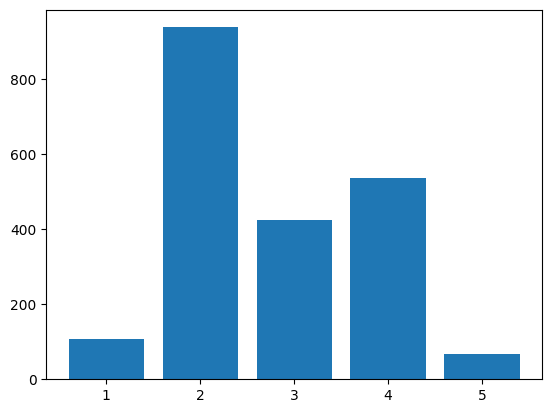

In [ ]:
df_incid['Reliability'].value_counts()
confiabilidade = df_incid['Reliability'].value_counts()
plt.bar(confiabilidade.index, confiabilidade.values)
plt.show()

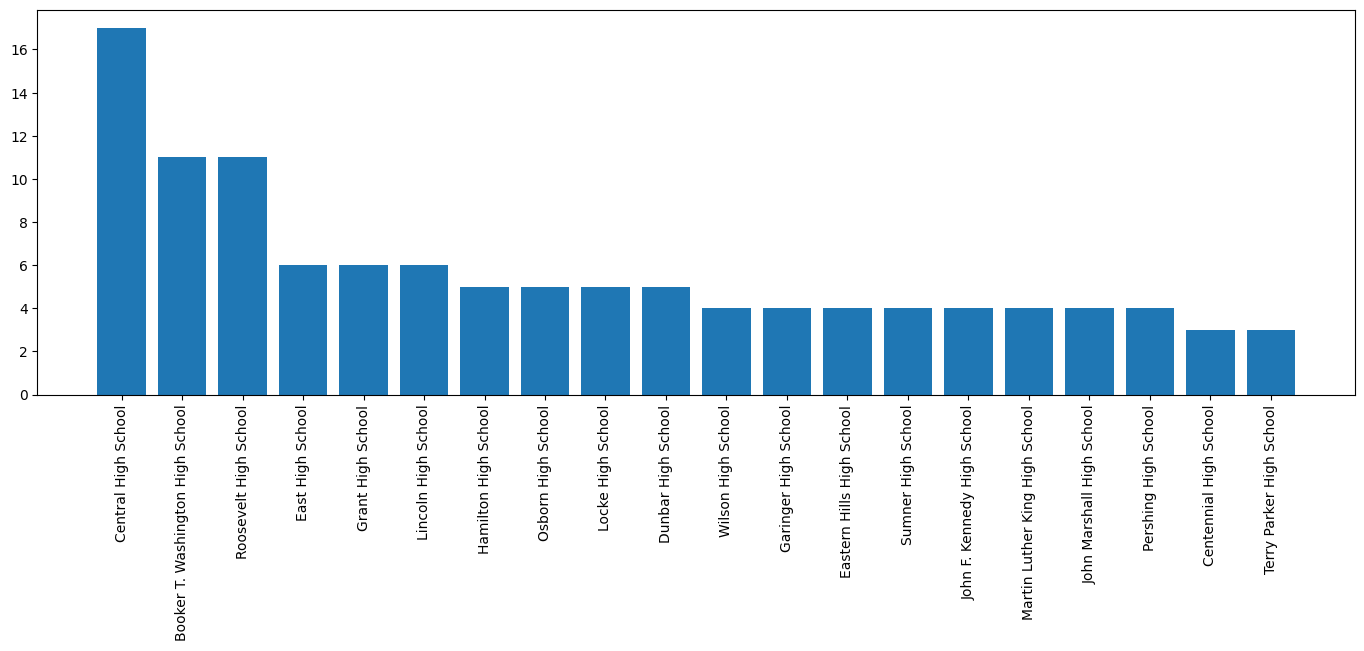

In [ ]:
escola20 = df_incid['School'].value_counts().head(20)
fig = plt.figure(figsize=(17, 5))
plt.bar(escola20.index, escola20.values)
plt.xticks(rotation=90)
plt.show()

### <font color ="#00b8ff">3.3 Análise do Violentador</font>

### <font color ="#00b8ff">3.4 Análise das Vítimas</font>

### <font color ="#00b8ff">3.5 Análise das Armas</font>

### <font color ="#00b8ff">3.6 Regressão Linear</font>